  Temporada          Jugador  Edad  Partidos   Minutos totales  Goles  \
0     17/18  Nathaniel Clyne    26          3              174      0   
1     18/19  Nathaniel Clyne    27          4              108      0   
2     20/21  Virgil Van Dijk    29          5              371      1   
3     21/22       Willy Boly    30         10              900      0   
4     22/23       Willy Boly    31         11              687      0   

   Asistencias  Gol * Min  Asist * Min  
0            0        0.0          0.0  
1            0        0.0          0.0  
2            0      371.0          0.0  
3            0        0.0          0.0  
4            1        0.0        687.0  
Index(['Temporada', 'Jugador', 'Edad', 'Partidos ', 'Minutos totales', 'Goles',
       'Asistencias', 'Gol * Min', 'Asist * Min'],
      dtype='object')


C:\Users\facur\AppData\Local\Temp\ipykernel_43676\670528255.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Partidos '].replace(0, 1, inplace=True)


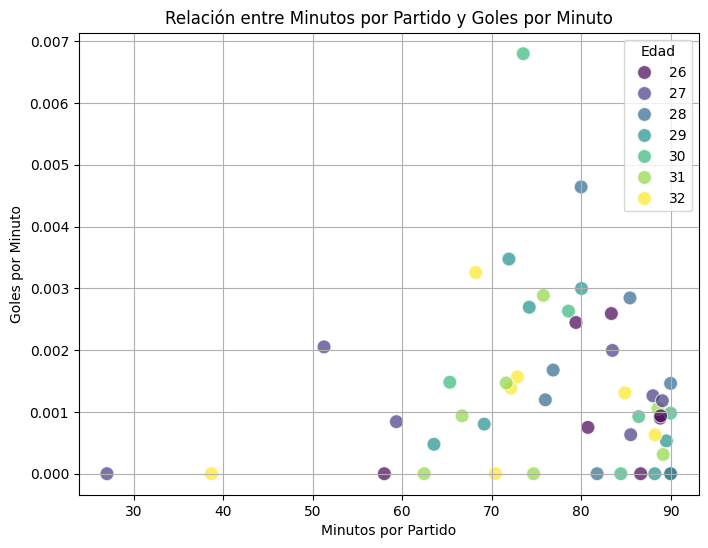

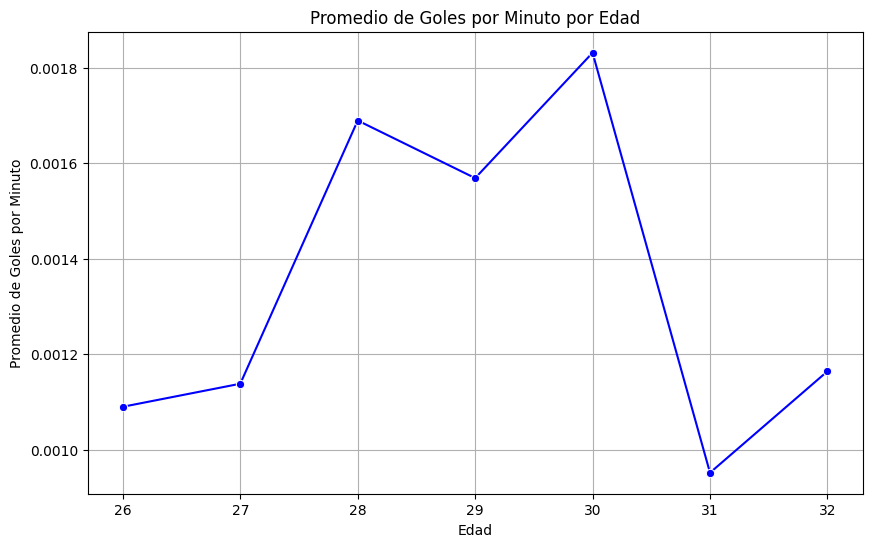

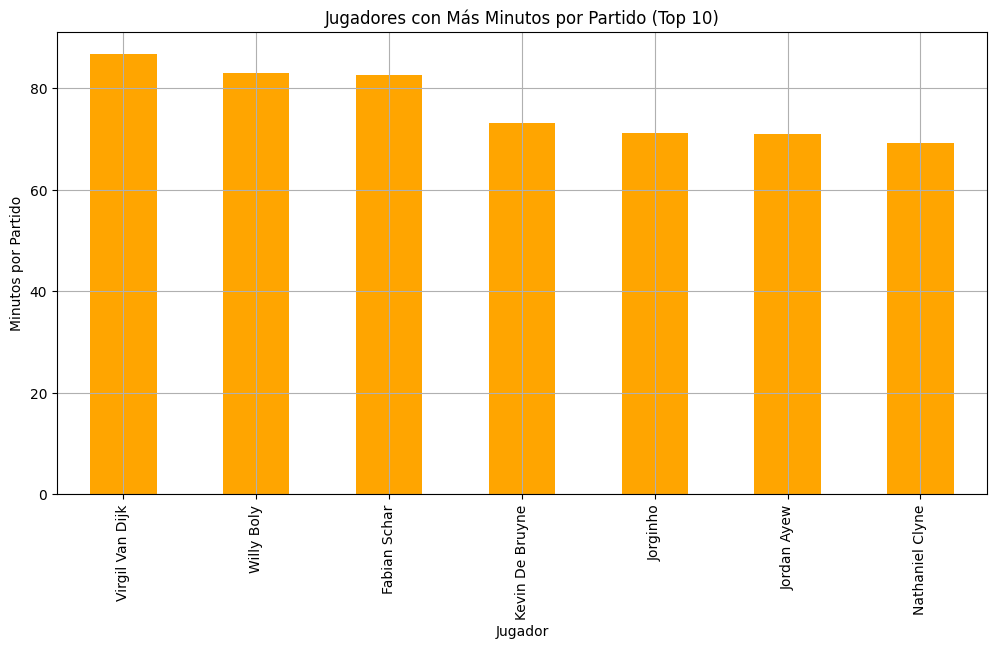

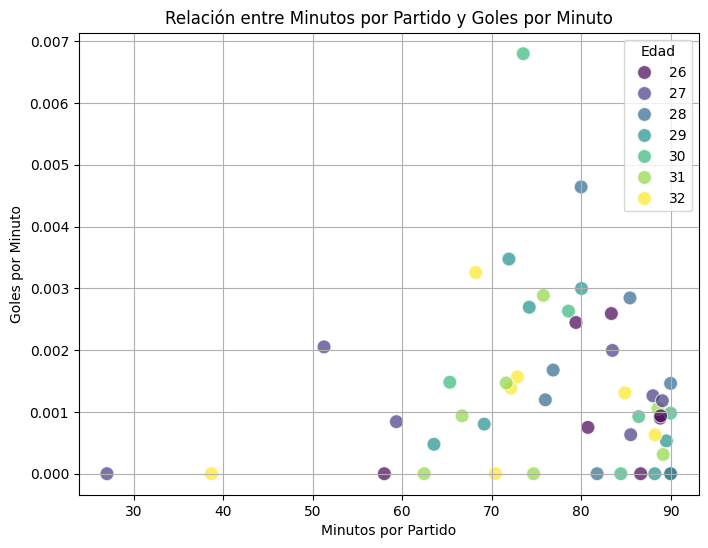

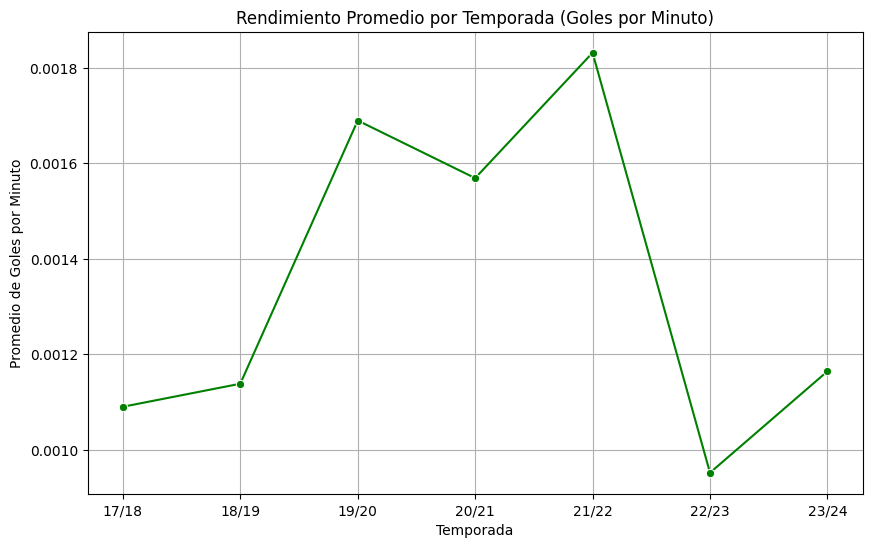

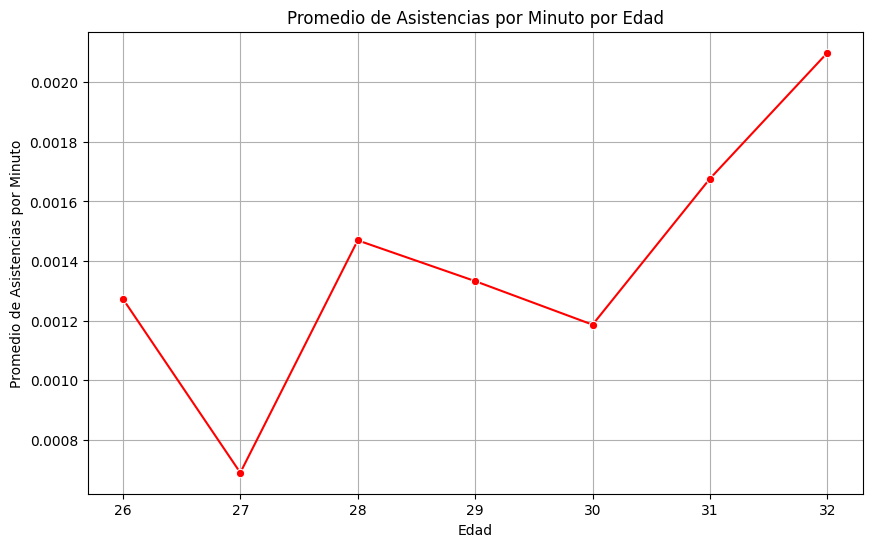

C:\Users\facur\AppData\Local\Temp\ipykernel_43676\670528255.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goles_asistencias_por_edad, x=goles_asistencias_por_edad.index, y='Goles por 1000 Minutos', palette='Blues_d')
C:\Users\facur\AppData\Local\Temp\ipykernel_43676\670528255.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goles_asistencias_por_edad, x=goles_asistencias_por_edad.index, y='Asistencias por 1000 Minutos', palette='Greens_d')


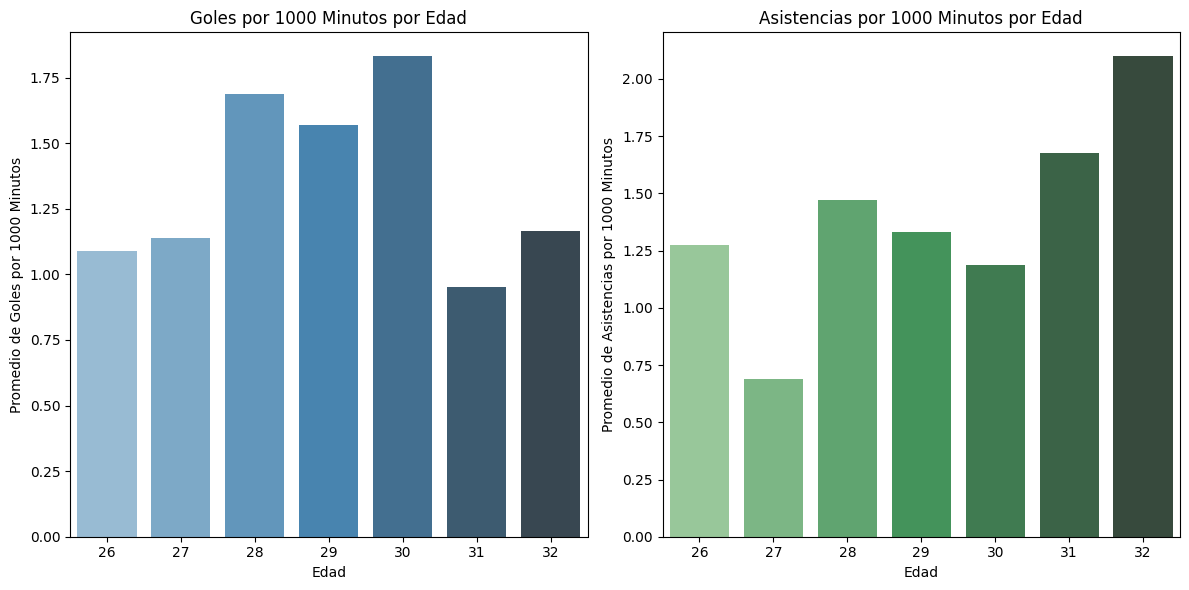

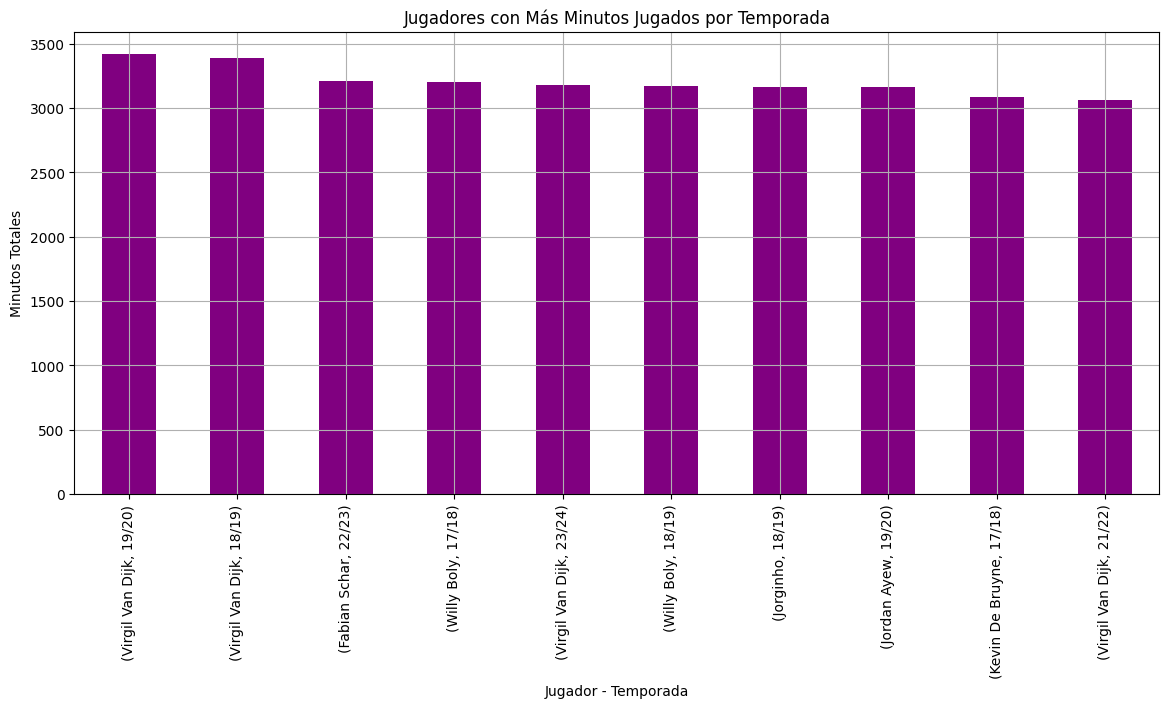

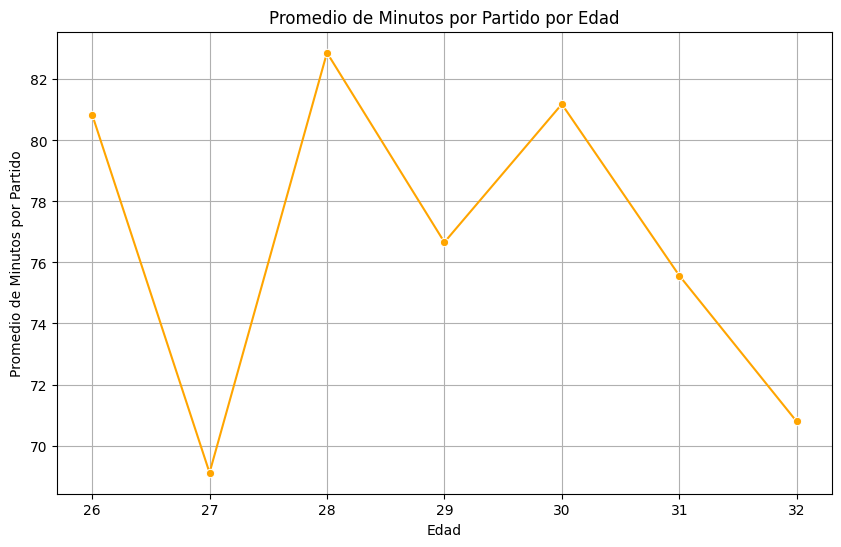

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos desde el archivo Excel
file_path = r"C:\Users\facur\OneDrive\Desktop\proyecto futbol.xlsx"
df = pd.read_excel(file_path)

# Verificar las primeras filas para asegurarse de que los datos se cargaron correctamente
print(df.head())

# Verificar los nombres exactos de las columnas (incluidos los espacios)
print(df.columns)

# Asegúrate de que no haya ceros en 'Partidos ' para evitar la división por cero
df['Partidos '].replace(0, 1, inplace=True)

# Calcular minutos por partido
df['Minutos por Partido'] = df['Minutos totales'] / df['Partidos ']

# Calcular Goles por Minuto
df['Goles por Minuto'] = df['Goles'] / df['Minutos totales']

# Eliminar filas con valores NaN en las columnas que estamos graficando
df = df.dropna(subset=['Minutos por Partido', 'Goles por Minuto'])

# Verificar si las columnas son numéricas
df['Minutos por Partido'] = pd.to_numeric(df['Minutos por Partido'], errors='coerce')
df['Goles por Minuto'] = pd.to_numeric(df['Goles por Minuto'], errors='coerce')

# Graficar la relación entre minutos por partido y goles por minuto
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Minutos por Partido', y='Goles por Minuto', hue='Edad', palette='viridis', s=100, alpha=0.7)

# Personalización del gráfico
plt.title('Relación entre Minutos por Partido y Goles por Minuto')
plt.xlabel('Minutos por Partido')
plt.ylabel('Goles por Minuto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Agrupar por edad y calcular el promedio de goles por minuto
goles_por_edad = df.groupby('Edad')['Goles por Minuto'].mean()

# Graficar la relación
plt.figure(figsize=(10, 6))
sns.lineplot(x=goles_por_edad.index, y=goles_por_edad.values, marker='o', color='blue')

# Personalización del gráfico
plt.title('Promedio de Goles por Minuto por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Goles por Minuto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Agrupar por jugador y calcular los minutos promedio por partido
minutos_por_jugador = df.groupby('Jugador')['Minutos por Partido'].mean()

# Graficar los jugadores con más minutos por partido
plt.figure(figsize=(12, 6))
minutos_por_jugador.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')

# Personalización del gráfico
plt.title('Jugadores con Más Minutos por Partido (Top 10)')
plt.xlabel('Jugador')
plt.ylabel('Minutos por Partido')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Graficar la relación entre minutos jugados por partido y goles por minuto
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Minutos por Partido', y='Goles por Minuto', hue='Edad', palette='viridis', s=100, alpha=0.7)

# Personalización del gráfico
plt.title('Relación entre Minutos por Partido y Goles por Minuto')
plt.xlabel('Minutos por Partido')
plt.ylabel('Goles por Minuto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Agrupar por temporada y calcular el promedio de goles por minuto
rendimiento_por_temporada = df.groupby('Temporada')['Goles por Minuto'].mean()

# Graficar el rendimiento por temporada
plt.figure(figsize=(10, 6))
sns.lineplot(x=rendimiento_por_temporada.index, y=rendimiento_por_temporada.values, marker='o', color='green')

# Personalización del gráfico
plt.title('Rendimiento Promedio por Temporada (Goles por Minuto)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles por Minuto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Suponiendo que tienes una columna 'Asistencias' en el DataFrame
df['Asistencias por Minuto'] = df['Asistencias'] / df['Minutos totales']

# Agrupar por edad y calcular el promedio de asistencias por minuto
asistencias_por_edad = df.groupby('Edad')['Asistencias por Minuto'].mean()

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(x=asistencias_por_edad.index, y=asistencias_por_edad.values, marker='o', color='red')

# Personalización del gráfico
plt.title('Promedio de Asistencias por Minuto por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Asistencias por Minuto')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Calcular goles y asistencias por cada 1000 minutos jugados
df['Goles por 1000 Minutos'] = (df['Goles'] / df['Minutos totales']) * 1000
df['Asistencias por 1000 Minutos'] = (df['Asistencias'] / df['Minutos totales']) * 1000

# Agrupar por edad y calcular el promedio de goles y asistencias por 1000 minutos
goles_asistencias_por_edad = df.groupby('Edad')[['Goles por 1000 Minutos', 'Asistencias por 1000 Minutos']].mean()

# Graficar
plt.figure(figsize=(12, 6))

# Graficar Goles por 1000 minutos
plt.subplot(1, 2, 1)
sns.barplot(data=goles_asistencias_por_edad, x=goles_asistencias_por_edad.index, y='Goles por 1000 Minutos', palette='Blues_d')
plt.title('Goles por 1000 Minutos por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Goles por 1000 Minutos')

# Graficar Asistencias por 1000 minutos
plt.subplot(1, 2, 2)
sns.barplot(data=goles_asistencias_por_edad, x=goles_asistencias_por_edad.index, y='Asistencias por 1000 Minutos', palette='Greens_d')
plt.title('Asistencias por 1000 Minutos por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Asistencias por 1000 Minutos')

plt.tight_layout()
plt.show()

# Agrupar por jugador y temporada para obtener los minutos totales jugados
minutos_totales_por_temporada = df.groupby(['Jugador', 'Temporada'])['Minutos totales'].sum()

# Graficar los jugadores con más minutos jugados por temporada
plt.figure(figsize=(14, 6))
minutos_totales_por_temporada.sort_values(ascending=False).head(10).plot(kind='bar', color='purple')

# Personalización del gráfico
plt.title('Jugadores con Más Minutos Jugados por Temporada')
plt.xlabel('Jugador - Temporada')
plt.ylabel('Minutos Totales')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Agrupar por edad y calcular el promedio de minutos por partido
minutos_por_edad = df.groupby('Edad')['Minutos por Partido'].mean()

# Graficar la relación entre edad y minutos por partido
plt.figure(figsize=(10, 6))
sns.lineplot(x=minutos_por_edad.index, y=minutos_por_edad.values, marker='o', color='orange')

# Personalización del gráfico
plt.title('Promedio de Minutos por Partido por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Minutos por Partido')
plt.grid(True)

# Mostrar el gráfico
plt.show()


